In [1]:
#https://www.kaggle.com/vjchoudhary7/kmeans-clustering-in-customer-segmentation/notebook
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization

In [ ]:
####Pentingg!!!

Data Set Omzet Tanaman Hias Kurang memiliki tipe data FLOAT jadi TIDAK BISA DIGUNAKAN

In [2]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('../content/drive/My Drive/data set/omzet tanaman hias.csv')

In [4]:
dataset.head(10)

,lokasi_penjualan,jenis_komoditi,omzet
0,Pasar Bunga Rawabelong,Melati,465200000
1,Pasar Bunga Rawabelong,Pihong,32365000
2,Pasar Bunga Rawabelong,Kenanga,10725000
3,Pasar Bunga Rawabelong,Kantil,1850000
4,Pasar Bunga Rawabelong,Ros Kampung/Ros Cipanas,300000
5,Pasar Bunga Rawabelong,Ros Rontokan Malang,31390000
6,Pasar Bunga Rawabelong,Mawar Tabur,12240000
7,Pasar Bunga Rawabelong,Pandan Iris,38760000
8,Pasar Bunga Rawabelong,Daun Sirih,2385000
9,Pasar Bunga Rawabelong,Buah Pinang,4870000


In [5]:
#total rows and colums in the dataset
dataset.shape

(205, 3)

In [6]:
dataset.info() # there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   lokasi_penjualan  205 non-null    object
 1   jenis_komoditi    205 non-null    object
 2   omzet             205 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.9+ KB


In [7]:
dataset.isna().sum()

lokasi_penjualan    0
jenis_komoditi      0
omzet               0
dtype: int64

In [8]:
#Missing values computation
dataset.isnull().sum()

lokasi_penjualan    0
jenis_komoditi      0
omzet               0
dtype: int64

In [9]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= dataset.iloc[:, [3,4]].values

IndexError: ignored

In [10]:
#WCSS (within cluster sum of squares)
from sklearn.cluster import KMeans
wcss=[]

In [11]:
for i in range(1,7):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

NameError: ignored

ValueError: ignored

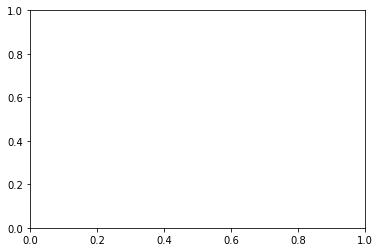

In [12]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,7), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [13]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

NameError: ignored

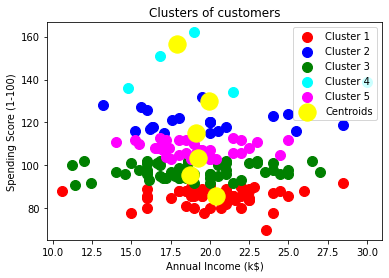

In [ ]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
###Model Interpretation 
#Cluster 1 (Red Color) -> earning high but spending less
#cluster 2 (Blue Colr) -> average in terms of earning and spending 
#cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]
#cluster 4 (cyan Color) -> earning less but spending more
#Cluster 5 (magenta Color) -> Earning less , spending less
